In [1]:
from car_part import CarPartDataset, CarPartConfig, prepare_datasets, preprocess_dataset
from pathlib import Path
from mrcnn import visualize
import colorsys
import random
import numpy as np
import mrcnn.model as modellib
from mrcnn.model import log
import scipy.io as sio
import os
import json

import matplotlib.pyplot as plt
plt.ion()

Using TensorFlow backend.


# Evaluate the model results

### Load the images

In [2]:
images = list(Path('../../../car-damage-estimation/data/car_nocar/car').glob('*.jpg'))

images_myhistory = list(Path('../../../car-damage-estimation/data/myhistory_cropped')\
                        .glob('*/*.jpg'))

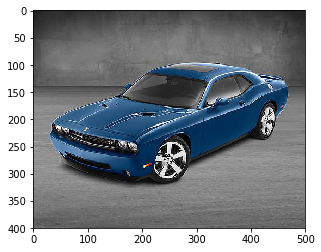

In [3]:
img = plt.imread(images[200])
plt.imshow(img)

# Load the last model

In [4]:
config = CarPartConfig()
MODEL_DIR = './logs/'
config.BATCH_SIZE

1

In [5]:
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
model.find_last()

'./logs/car_parts20190420T0828/mask_rcnn_car_parts_0160.h5'

In [7]:
model.load_weights(model.find_last(), by_name=True)

Re-starting from epoch 160


open the part dictionary

In [8]:
with open('./parts_idx_dict.json', 'r') as f:
    parts_idx_dict = json.load(f)
    parts_idx_dict['background'] = 0
    
idx_parts_dict = {v:k for k,v in parts_idx_dict.items()}
idx_parts_dict

{1: 'backside',
 2: 'bliplate',
 3: 'door_1',
 4: 'door_2',
 5: 'door_3',
 6: 'fliplate',
 7: 'frontside',
 8: 'headlight_1',
 9: 'headlight_2',
 10: 'headlight_3',
 11: 'headlight_4',
 12: 'headlight_5',
 13: 'headlight_6',
 14: 'leftmirror',
 15: 'leftside',
 16: 'rightmirror',
 17: 'rightside',
 18: 'roofside',
 19: 'wheel_1',
 20: 'wheel_2',
 21: 'wheel_3',
 22: 'wheel_4',
 23: 'wheel_5',
 24: 'window_1',
 25: 'window_2',
 26: 'window_3',
 27: 'window_4',
 28: 'window_5',
 29: 'window_6',
 30: 'window_7',
 0: 'background'}

create a color map

In [9]:
colors = visualize.generate_colormap(len(idx_parts_dict), scaled=False, bright=False)

## make a subplot

In [10]:
def make_subplot(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Inspect the model results

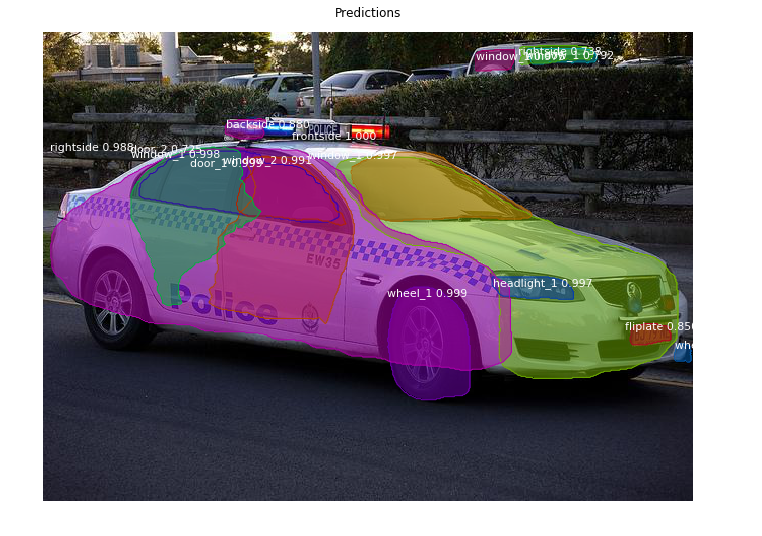

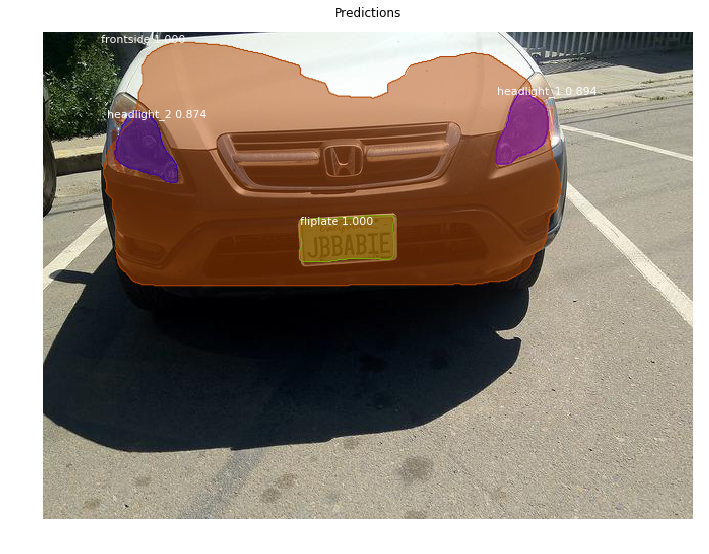

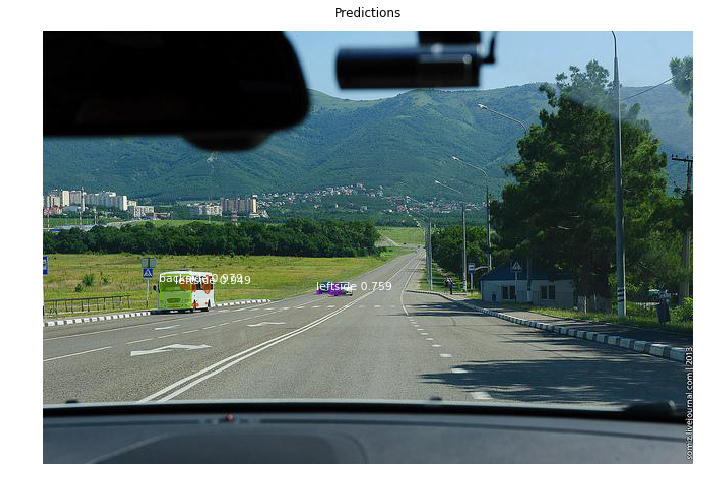

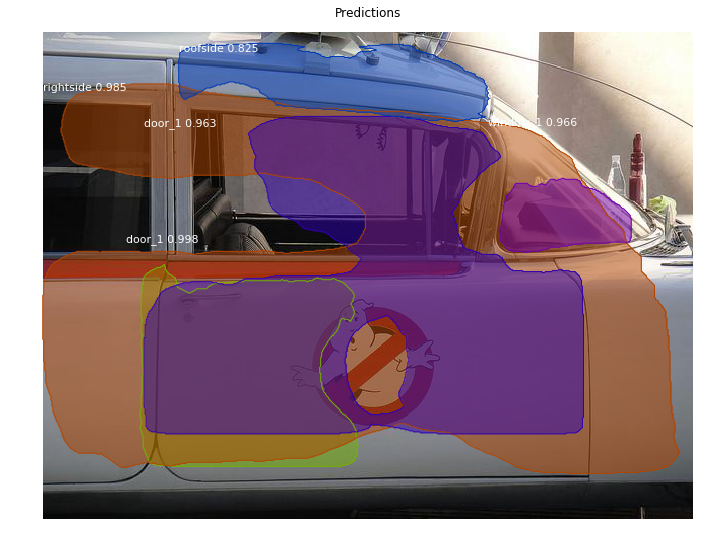

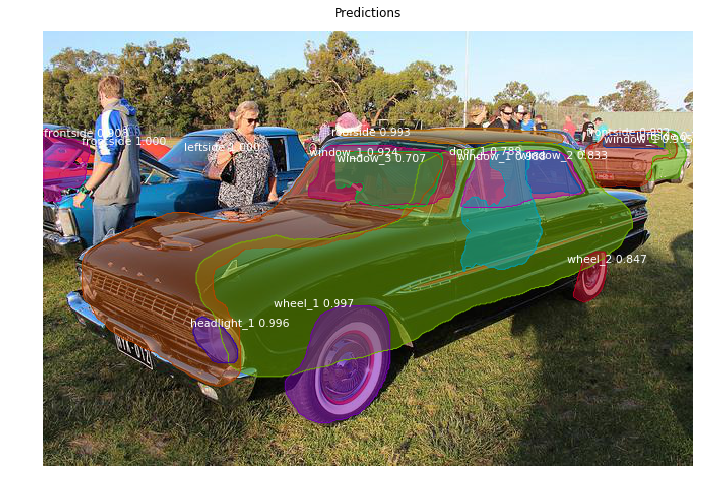

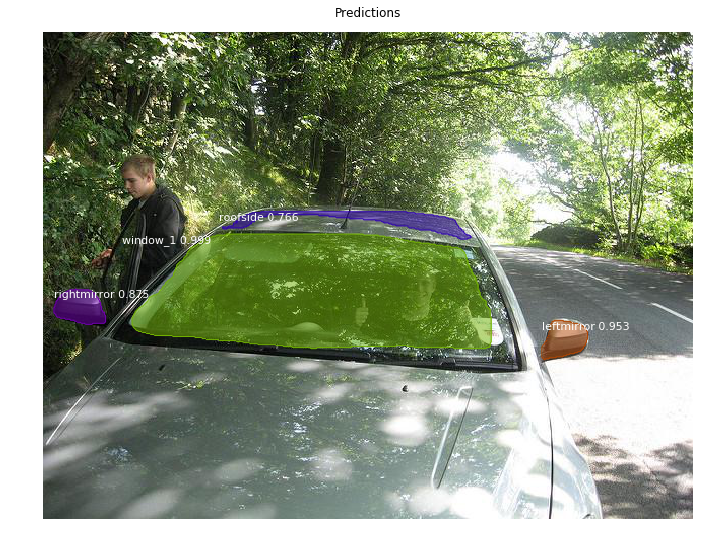

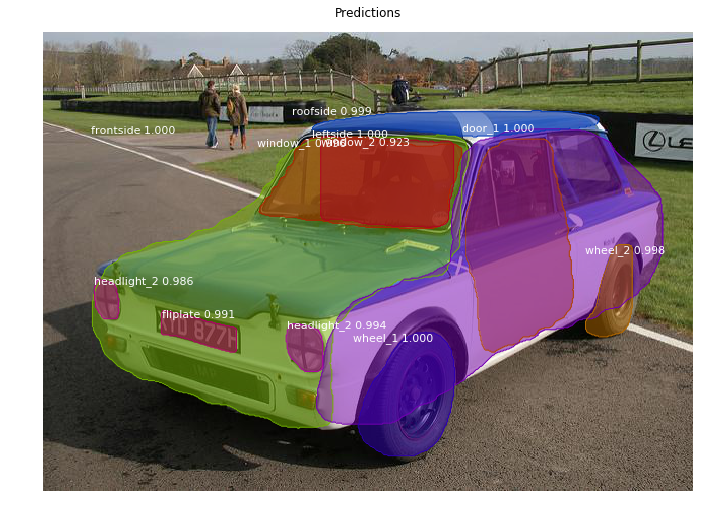

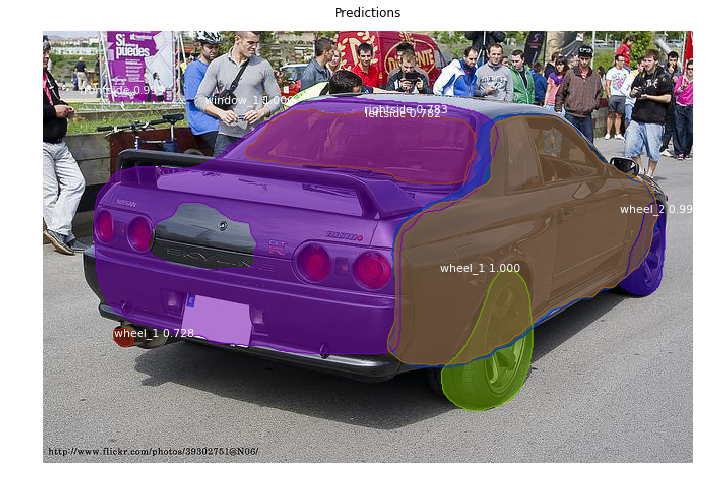

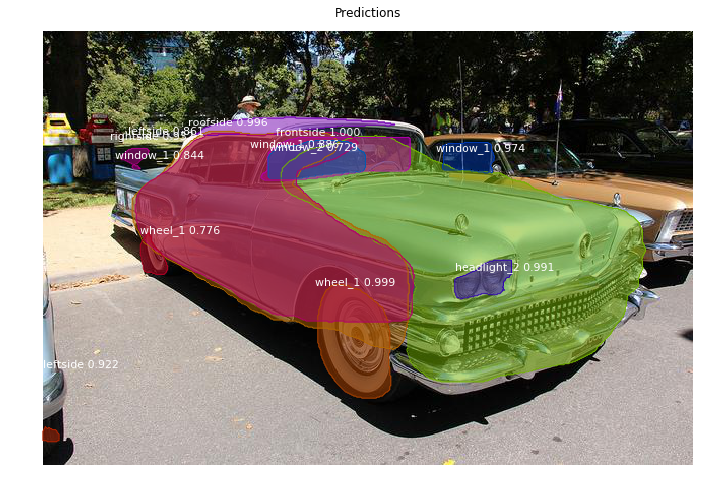

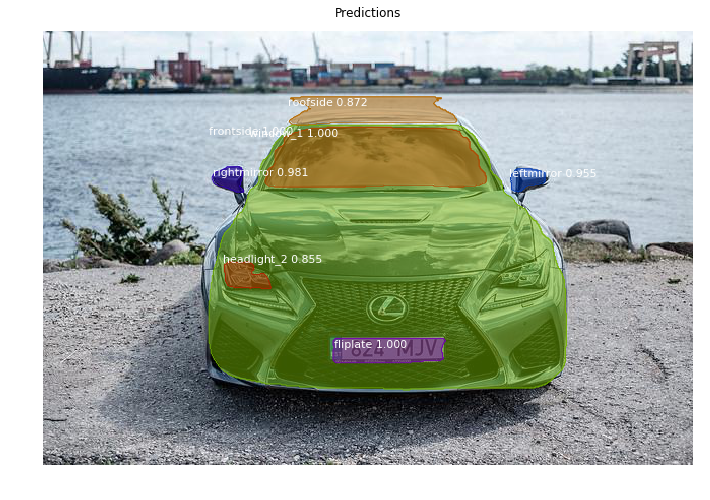

In [11]:
#select an image
for _ in range(10):
    i = random.randint(0, len(images))
    img = plt.imread(images[i])
    result = model.detect([img])[0]
    ax = make_subplot(rows=1, size=12)

    img = visualize.display_instances(img, result['rois'], result['masks'], result['class_ids'], 
                                idx_parts_dict, colors, result['scores'], ax=ax,
                                title="Predictions", show_bbox=False)
    plt.show()